In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn import *
from icecream import ic
from datetime import datetime

In [41]:
#Read in data for August and Febuary-looking at seperate building sections

pd.read_csv('CSV Data/Annex East Active Power_August.csv')

AnnexEastAug = pd.read_csv('CSV Data/Annex East Active Power_August.csv')
AnnexEastFeb = pd.read_csv('CSV Data/Annex East Active Power_Feb.csv')

HarrisSouthAug = pd.read_csv('CSV Data/Harris North South Active Power_August.csv')
HarrisSouthFeb = pd.read_csv('CSV Data/Harris North South Active Power_Feb.csv')

#Display CSV as an example
pd.read_csv('CSV Data/Annex East Active Power_August.csv')

,DateTime,ANNEX_AE2_ACTIVE_POWER,ANNEX_AE4_ACTIVE_POWER,ANNEX_AE5_ACTIVE_POWER,ANNEX_AE7_ACTIVE_POWER,ANNEX_AE9_ACTIVE_POWER
0,8/13/2021 0:00,0.2881,0.0006,0.3093,6.093900,0.1572
1,8/13/2021 0:12,0.2628,0.0007,0.3308,5.853000,0.1715
2,8/13/2021 0:24,0.2608,0.0006,0.3307,6.021000,0.1545
3,8/13/2021 0:36,0.2936,0.0007,0.3003,5.909400,0.1675
4,8/13/2021 0:48,0.2736,0.0006,0.3238,5.937601,0.1520
...,...,...,...,...,...,...
596,8/17/2021 23:12,0.3356,0.0007,0.3246,6.200000,0.1551
597,8/17/2021 23:24,0.3167,0.0006,0.3026,6.127800,0.1655
598,8/17/2021 23:36,0.3361,0.0006,0.3015,6.158700,0.1492
599,8/17/2021 23:48,0.2803,0.0006,0.3222,6.103801,0.1641


In [45]:
#Return Mondays, can be quickly mofified to return any day of the week
def filt(row: pd.Series) -> bool:
    return pd.Timestamp(datetime.strptime(row['DateTime'].split()[0], '%m/%d/%Y').strftime('%Y-%m-%d')).day_name() == 'Monday'
    
AnnexEastAugMonday = AnnexEastAug[AnnexEastAug.apply(filt, axis=1)]
print(AnnexEastAugMonday)


            DateTime  ANNEX_AE2_ACTIVE_POWER  ANNEX_AE4_ACTIVE_POWER  \
360   8/16/2021 0:00                  0.2582                  0.0007   
361   8/16/2021 0:12                  0.2925                  0.0006   
362   8/16/2021 0:24                  0.2716                  0.0006   
363   8/16/2021 0:36                  0.2599                  0.0007   
364   8/16/2021 0:48                  0.2585                  0.0007   
..               ...                     ...                     ...   
475  8/16/2021 23:00                  0.3223                  0.0006   
476  8/16/2021 23:12                  0.3312                  0.0007   
477  8/16/2021 23:24                  0.3175                  0.0006   
478  8/16/2021 23:36                  0.3306                  0.0007   
479  8/16/2021 23:48                  0.2831                  0.0006   

     ANNEX_AE5_ACTIVE_POWER  ANNEX_AE7_ACTIVE_POWER  ANNEX_AE9_ACTIVE_POWER  
360                  0.3075                5.408000      

In [46]:
#Describe numerical statistics of data including things like mean, std dev, etc
AnnexEastAug.describe()

,HARRIS_HN1_ACTIVE_POWER,HARRIS_HN2_ACTIVE_POWER,HARRIS_HN3_ACTIVE_POWER,HARRIS_HS1_ACTIVE_POWER,HARRIS_HS2_ACTIVE_POWER,HARRIS_HS3_ACTIVE_POWER
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,-0.000022,0.516110,0.260717,0.384196,0.424922,0.313540
std,0.000044,0.133471,0.018148,0.043442,0.118998,0.017086
min,-0.000100,0.193900,0.222500,0.263300,0.108600,0.275900
25%,0.000000,0.469200,0.249900,0.358800,0.373500,0.299400
50%,0.000000,0.547200,0.259200,0.389000,0.425200,0.316500
75%,0.000000,0.603700,0.268500,0.413200,0.497800,0.323800
max,0.000100,0.869500,0.417900,0.497800,0.872700,0.427700


In [47]:
#Describe numerical statistics of data including things like mean, std dev, etc
AnnexEastFeb.describe()

,ANNEX_AE2_ACTIVE_POWER,ANNEX_AE4_ACTIVE_POWER,ANNEX_AE5_ACTIVE_POWER,ANNEX_AE7_ACTIVE_POWER,ANNEX_AE9_ACTIVE_POWER
count,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.318584,0.000622,0.312579,0.034664,0.141871
std,0.013199,0.000042,0.015985,0.000544,0.012941
min,0.283800,0.000500,0.283000,0.033600,0.115100
25%,0.310700,0.000600,0.298400,0.034400,0.134900
50%,0.317800,0.000600,0.314000,0.034600,0.142600
75%,0.325800,0.000600,0.322800,0.034900,0.149400
max,0.375300,0.000700,0.359500,0.044500,0.191300


In [48]:
#Describe numerical statistics of data including things like mean, std dev, etc
HarrisSouthAug.describe()

,HARRIS_HN1_ACTIVE_POWER,HARRIS_HN2_ACTIVE_POWER,HARRIS_HN3_ACTIVE_POWER,HARRIS_HS1_ACTIVE_POWER,HARRIS_HS2_ACTIVE_POWER,HARRIS_HS3_ACTIVE_POWER
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,-0.002730,2.605234,0.323727,0.393000,1.690546,0.314680
std,0.000789,0.973487,0.017098,0.060089,0.838601,0.008443
min,-0.004519,0.140200,0.289022,0.288849,0.158722,0.284006
25%,-0.003443,2.037400,0.309547,0.352630,1.300105,0.308685
50%,-0.002715,2.608900,0.323386,0.384422,1.666450,0.311999
75%,-0.002017,3.292200,0.335299,0.436558,2.305369,0.322166
max,-0.000926,5.133900,0.379587,0.565082,3.296229,0.333503


In [49]:
#Describe numerical statistics of data including things like mean, std dev, etc
HarrisSouthFeb.describe()

,HARRIS_HN1_ACTIVE_POWER,HARRIS_HN2_ACTIVE_POWER,HARRIS_HN3_ACTIVE_POWER,HARRIS_HS1_ACTIVE_POWER,HARRIS_HS2_ACTIVE_POWER,HARRIS_HS3_ACTIVE_POWER
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,-0.000022,0.516110,0.260717,0.384196,0.424922,0.313540
std,0.000044,0.133471,0.018148,0.043442,0.118998,0.017086
min,-0.000100,0.193900,0.222500,0.263300,0.108600,0.275900
25%,0.000000,0.469200,0.249900,0.358800,0.373500,0.299400
50%,0.000000,0.547200,0.259200,0.389000,0.425200,0.316500
75%,0.000000,0.603700,0.268500,0.413200,0.497800,0.323800
max,0.000100,0.869500,0.417900,0.497800,0.872700,0.427700


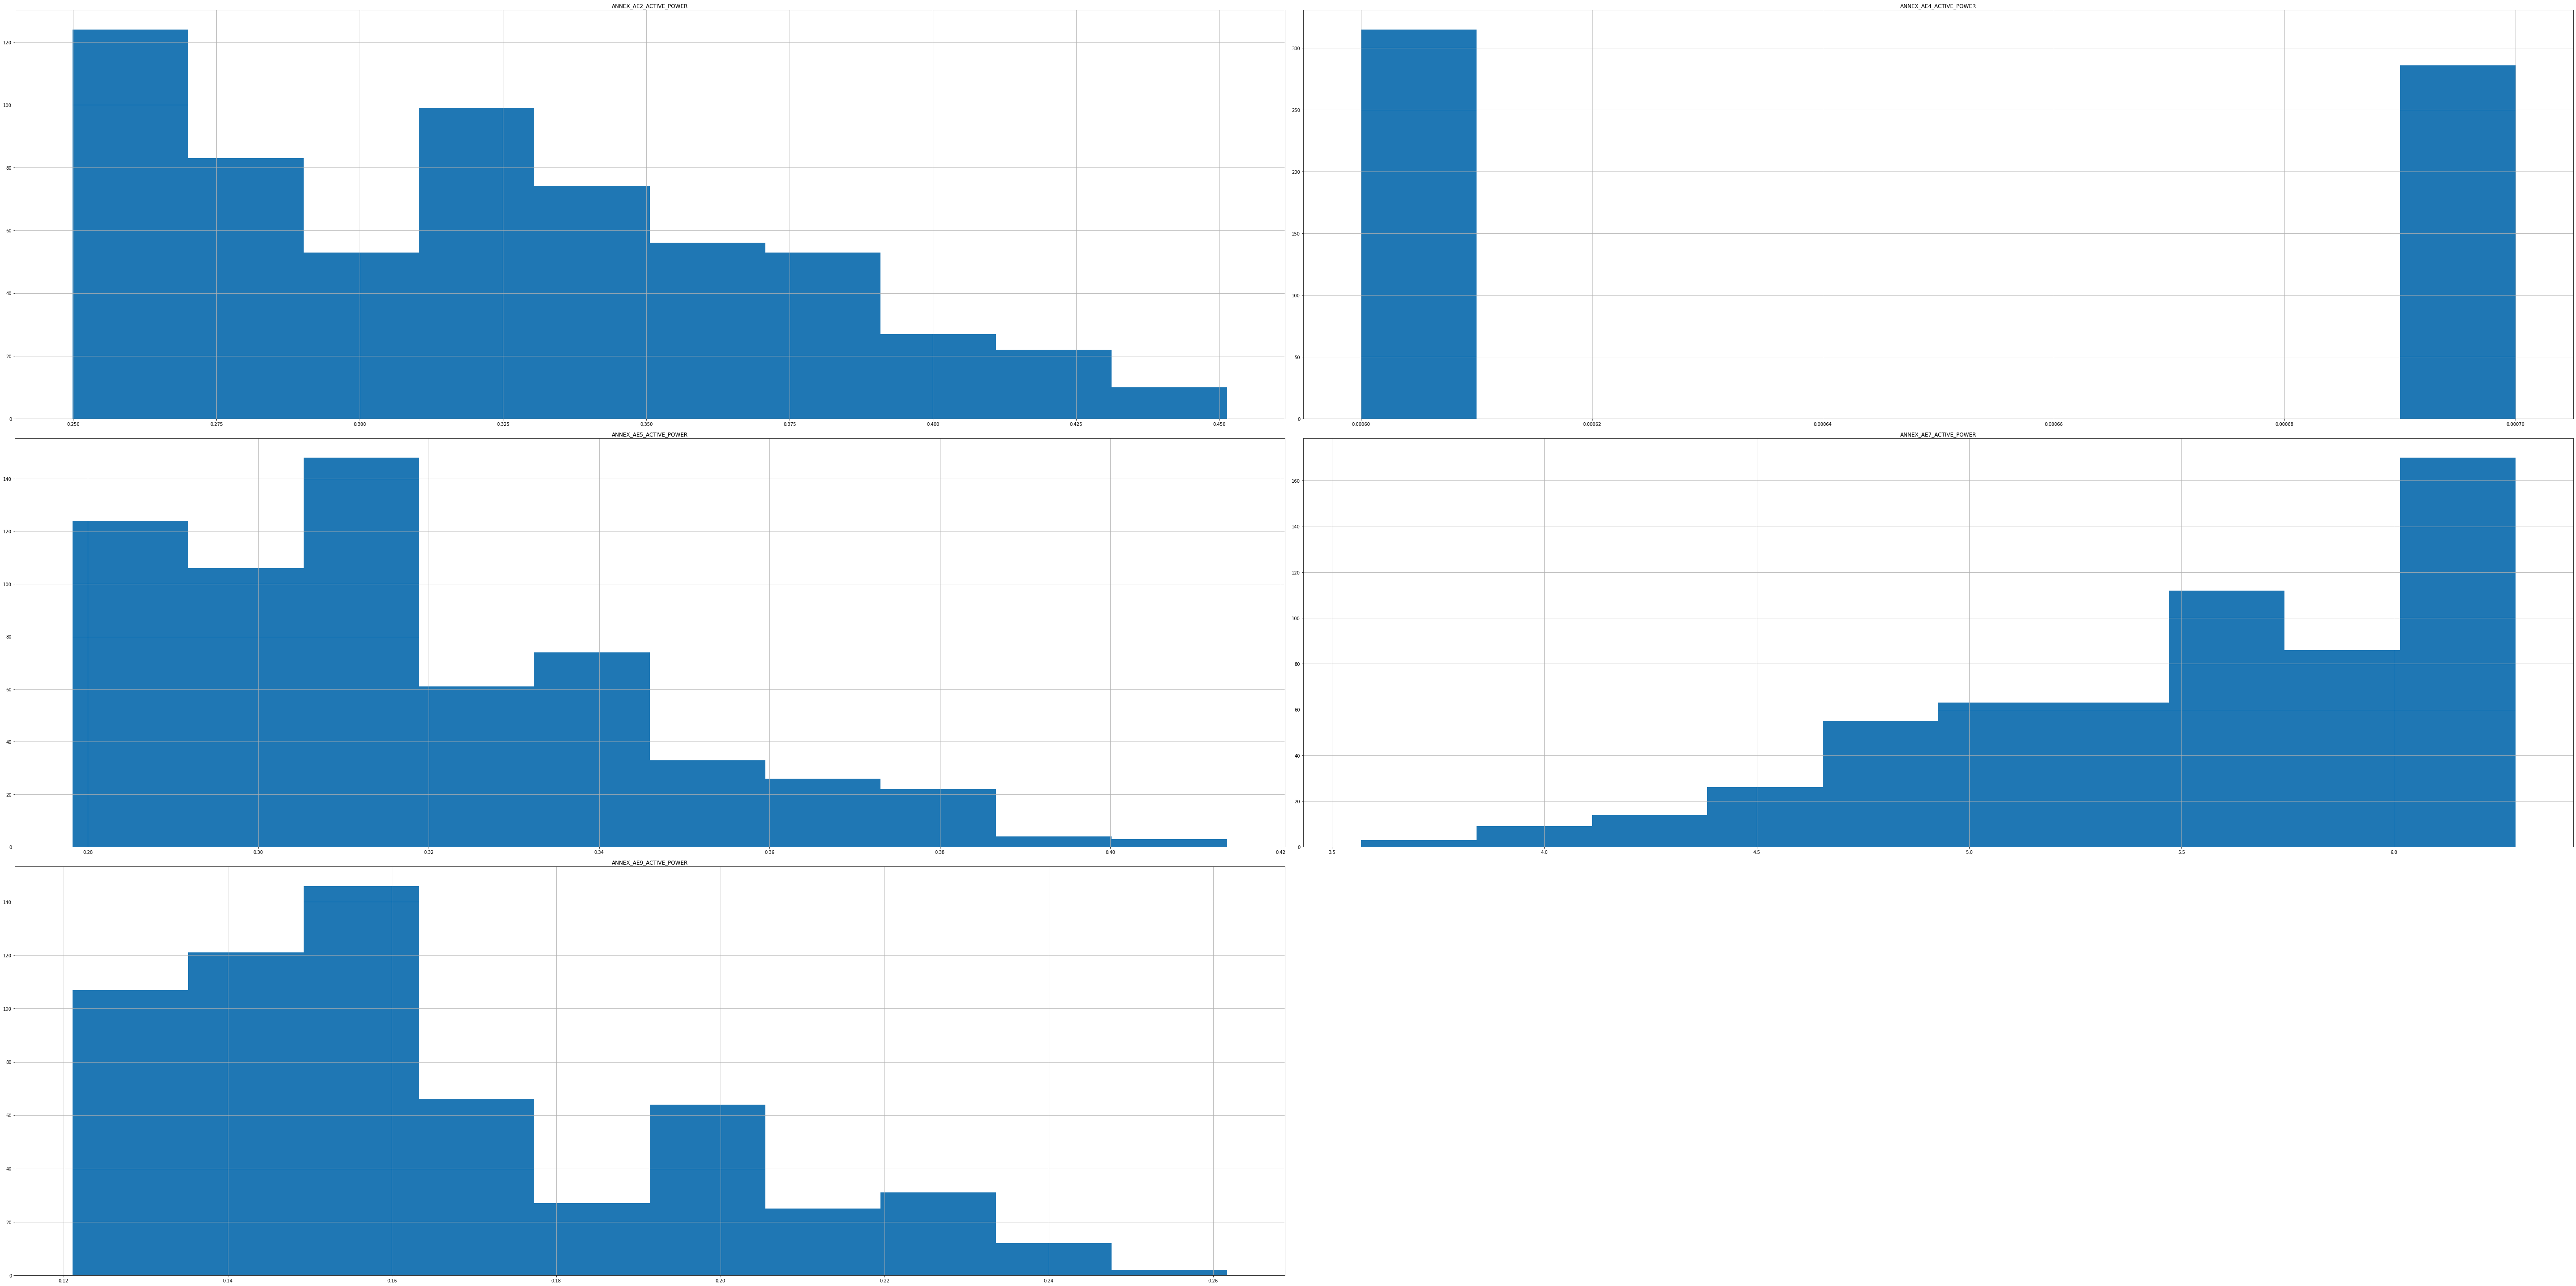

In [51]:
#Plot histograms-displays a histogram for each buildings(or sections) across all demands
AnnexEastAug.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.tight_layout()
plt.show()

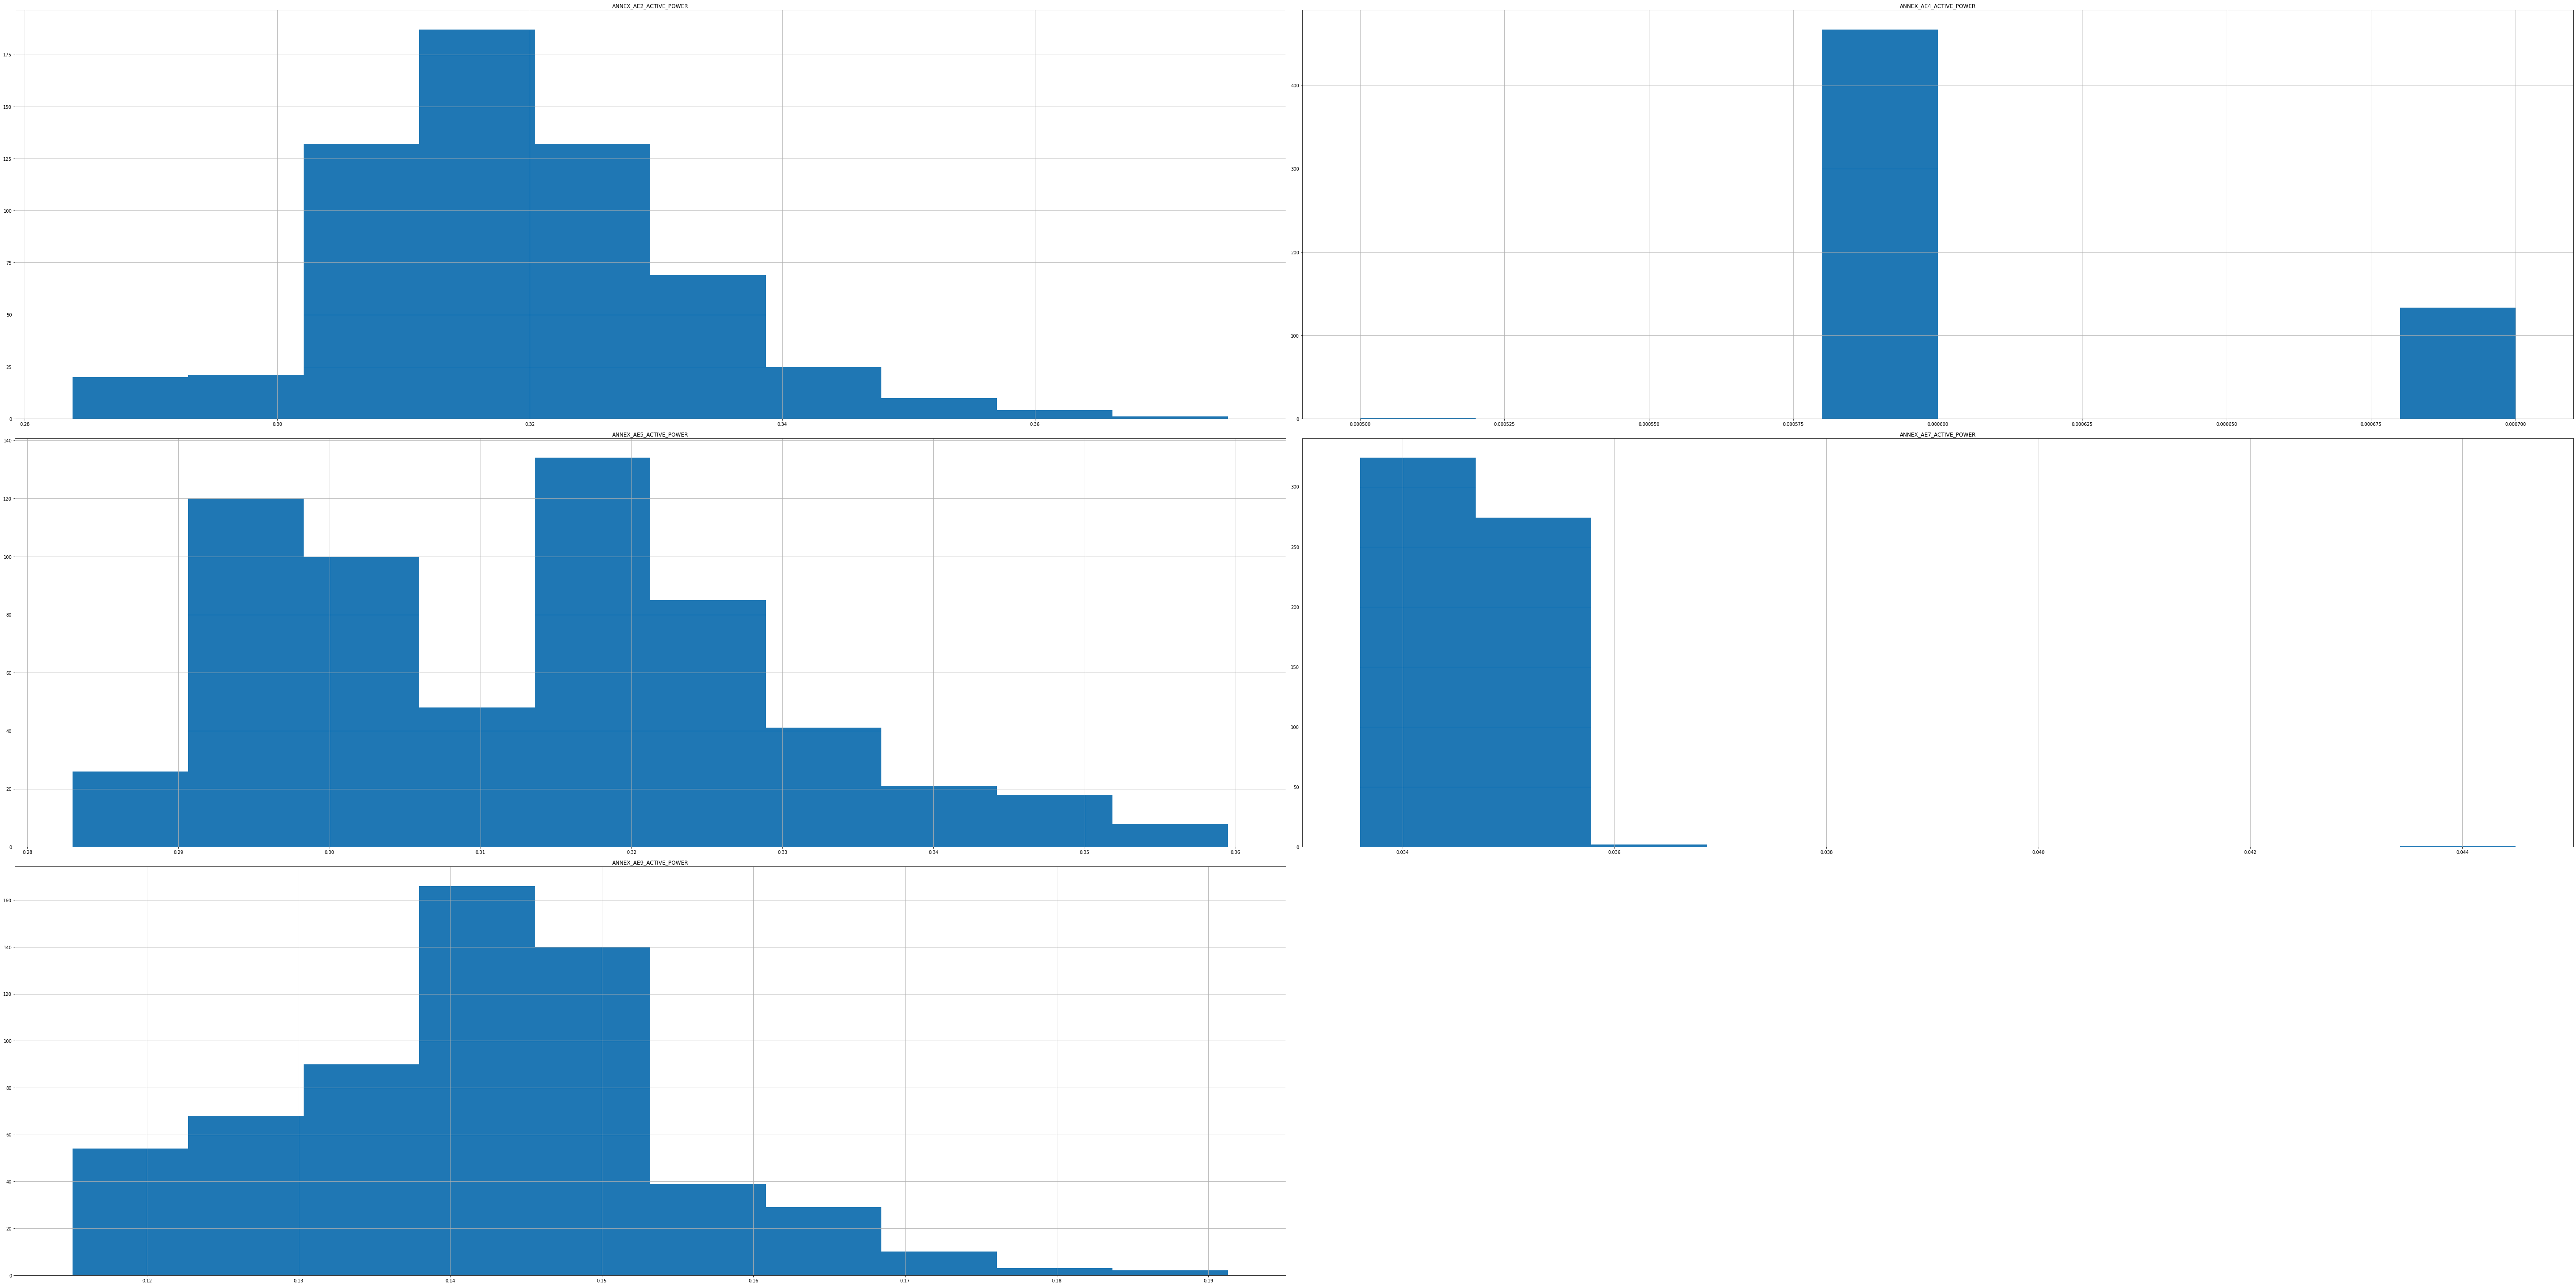

In [52]:
#Plot histograms-displays a histogram for each buildings(or sections) across all demands
AnnexEastFeb.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.tight_layout()
plt.show()

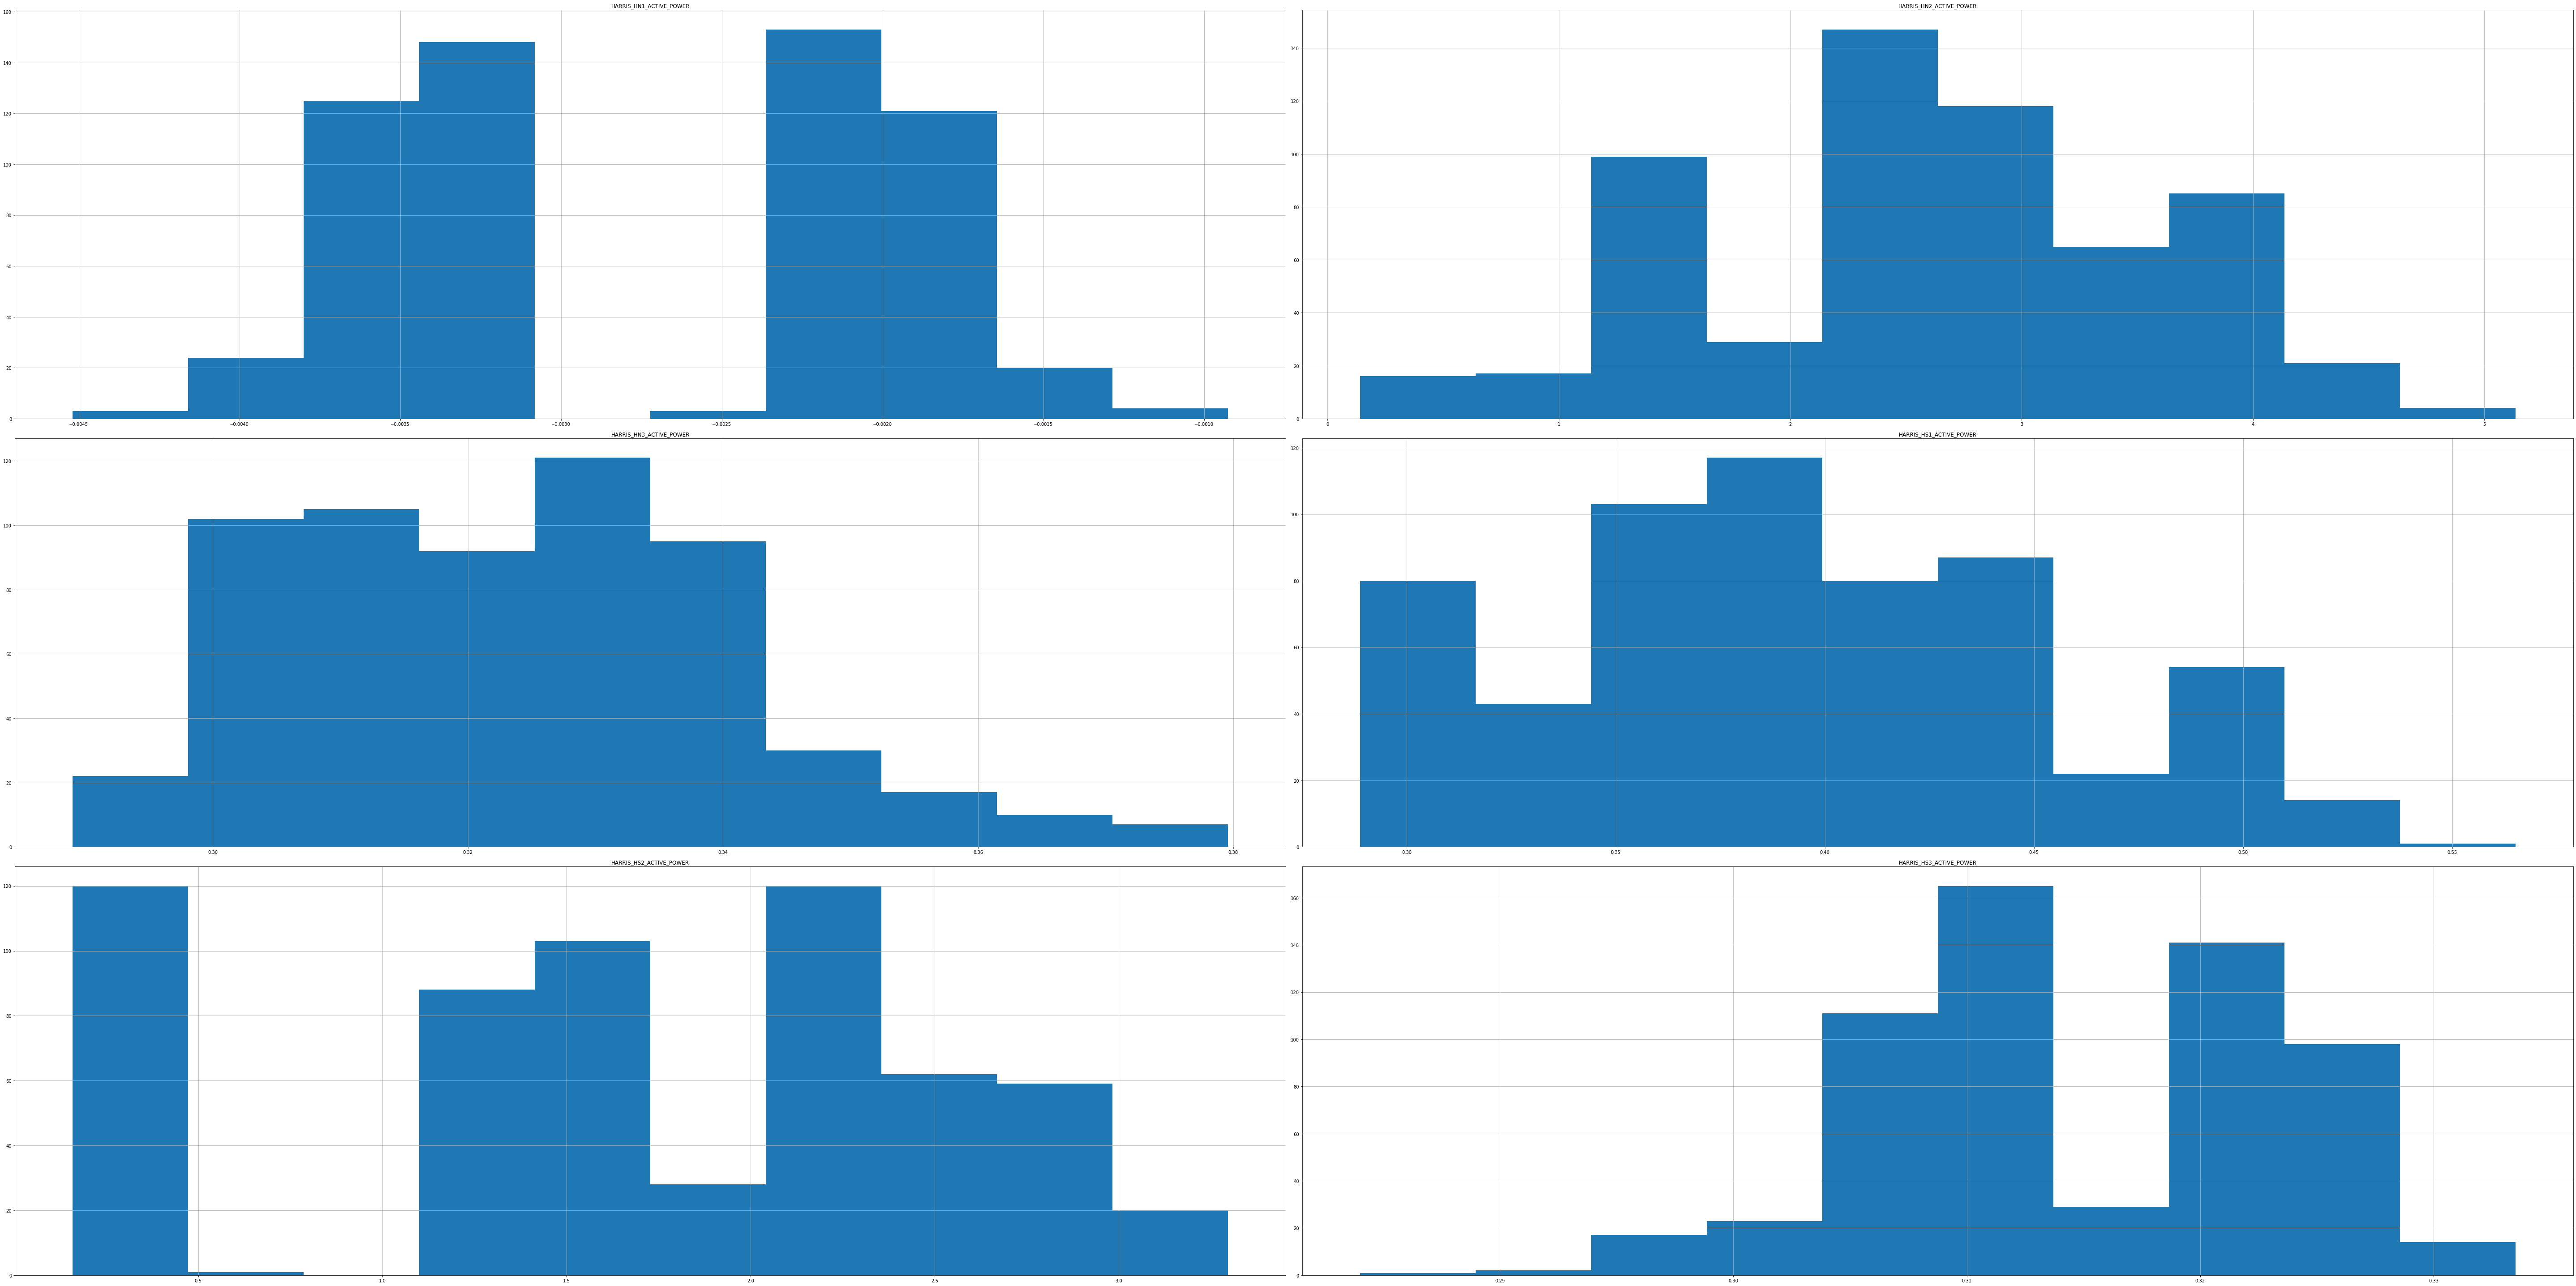

In [53]:
#Plot histograms-displays a histogram for each buildings(or sections) across all demands
HarrisSouthAug.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.tight_layout()
plt.show()

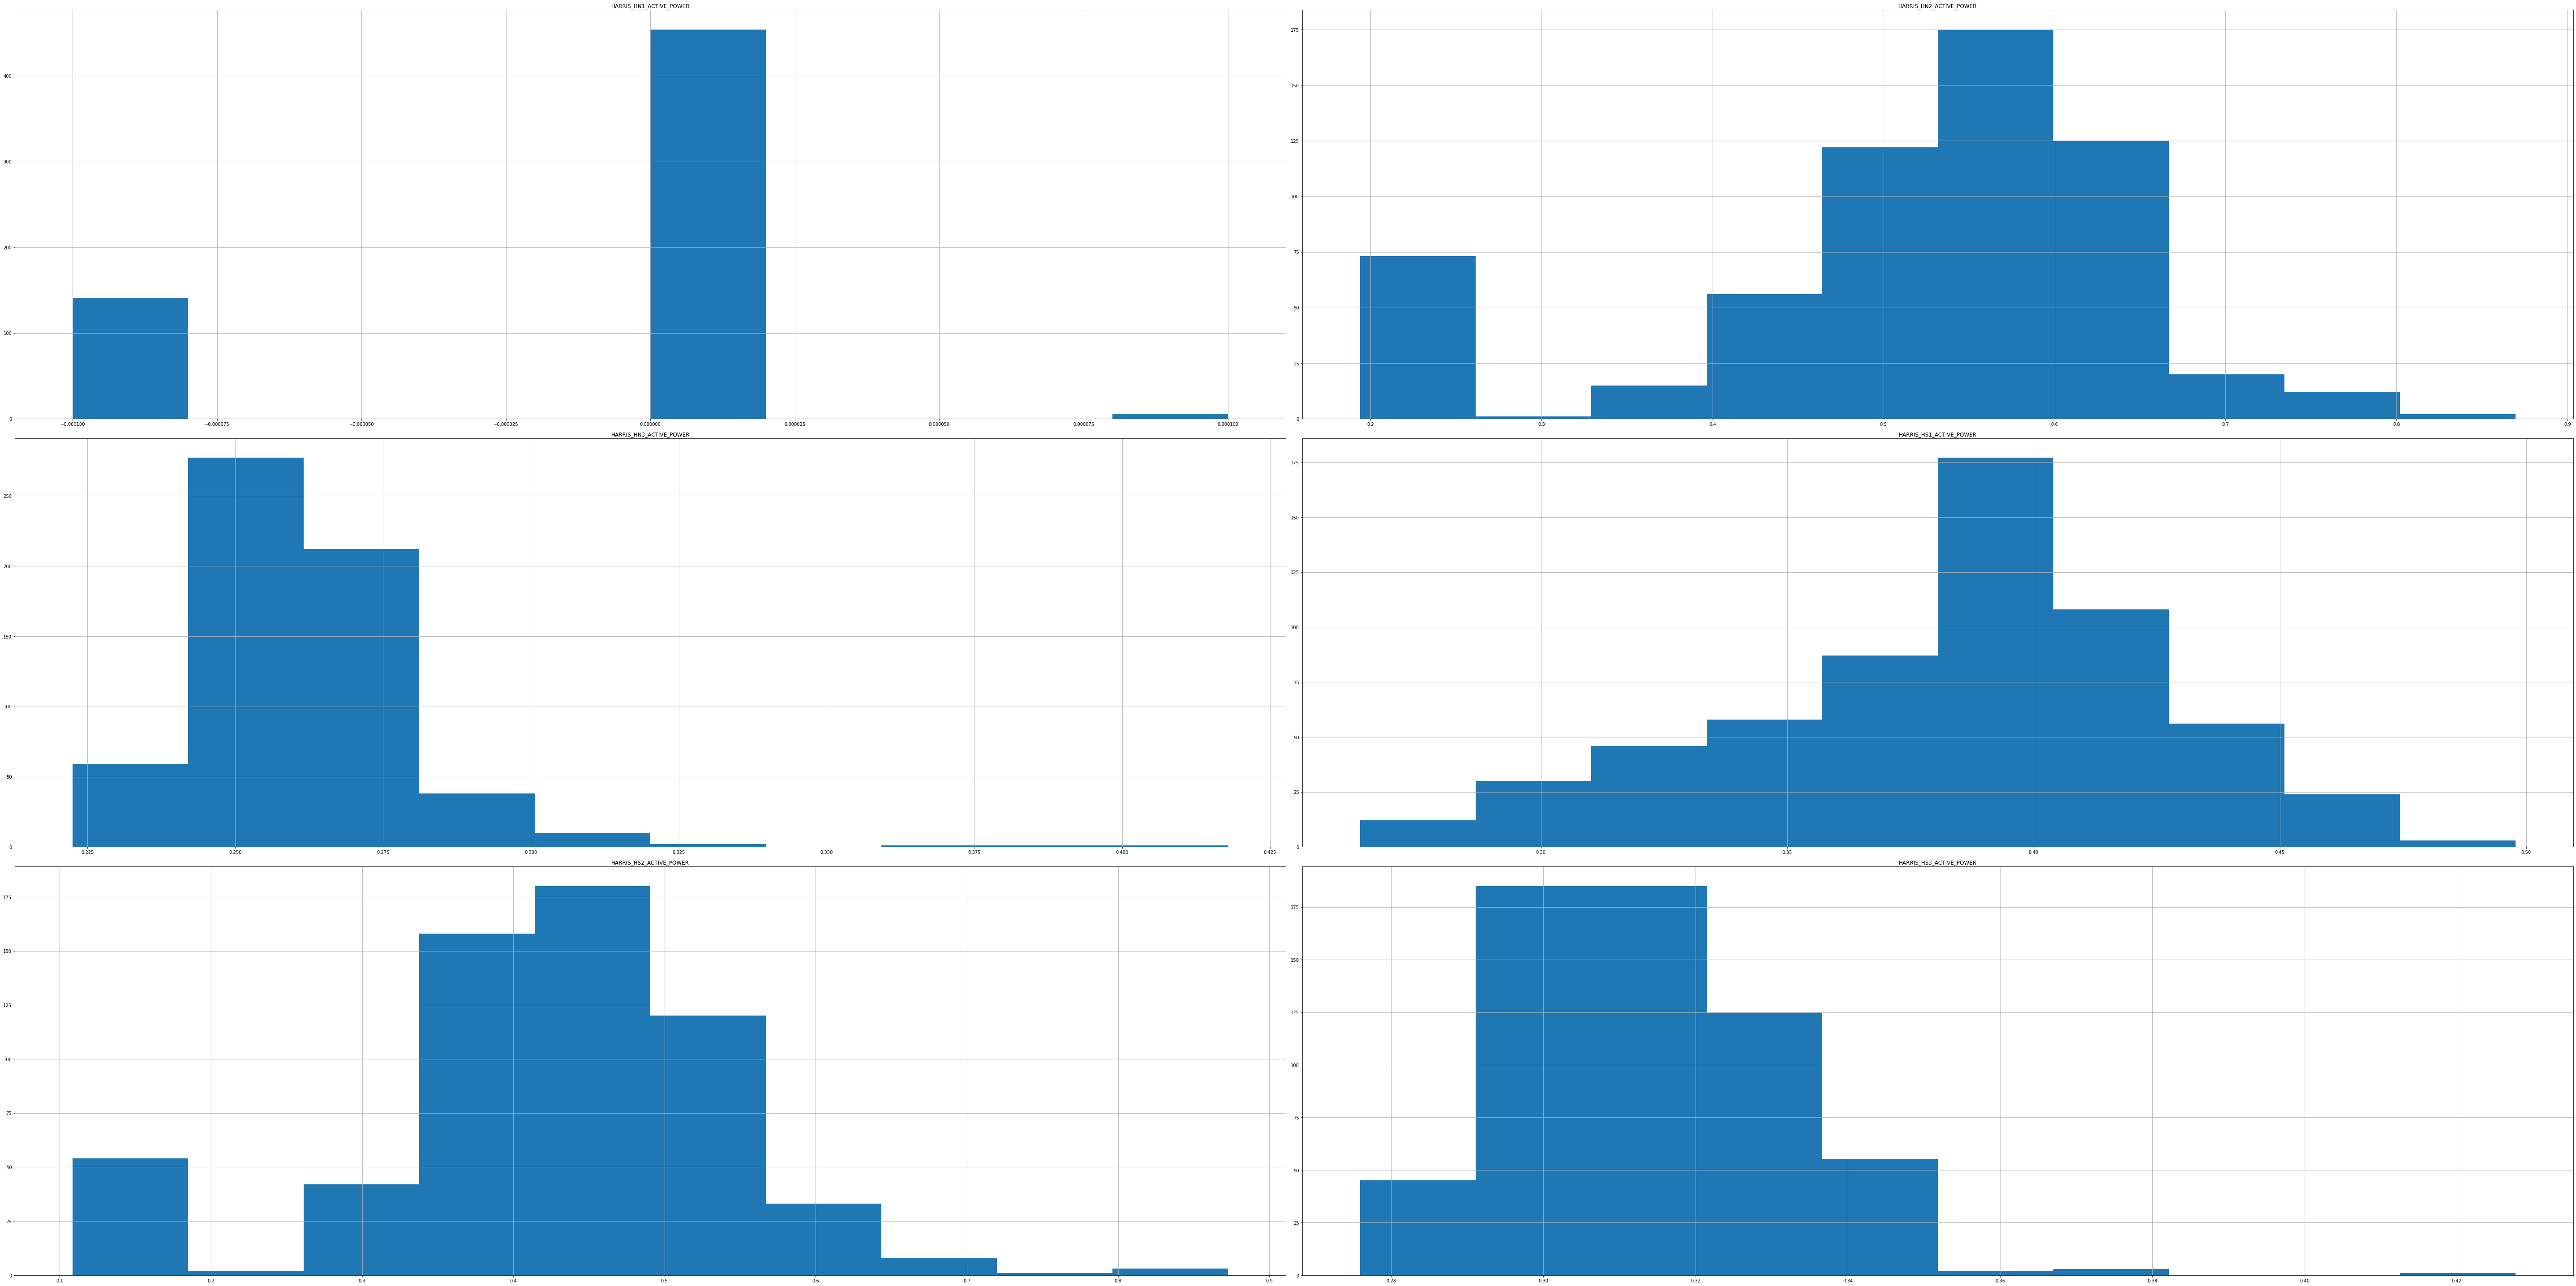

In [55]:
#Plot histograms-displays a histogram for each buildings(or sections) across all demands
HarrisSouthFeb.select_dtypes(include=np.number).hist(figsize=(80,40))
plt.tight_layout()
plt.show()

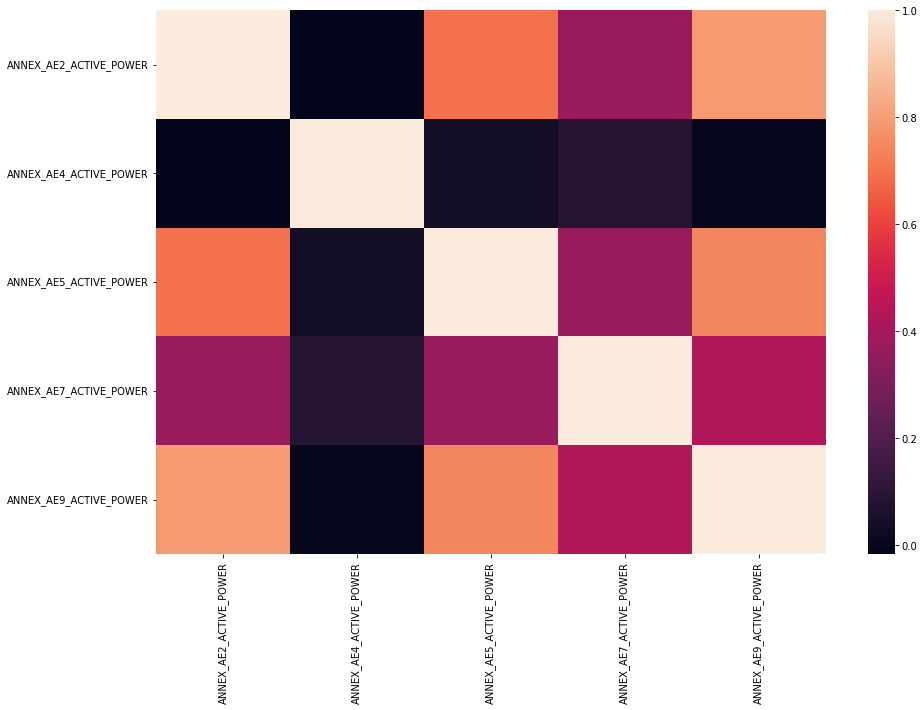

In [56]:
#Create correlation matrix
correlationMatrix = AnnexEastAug.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()

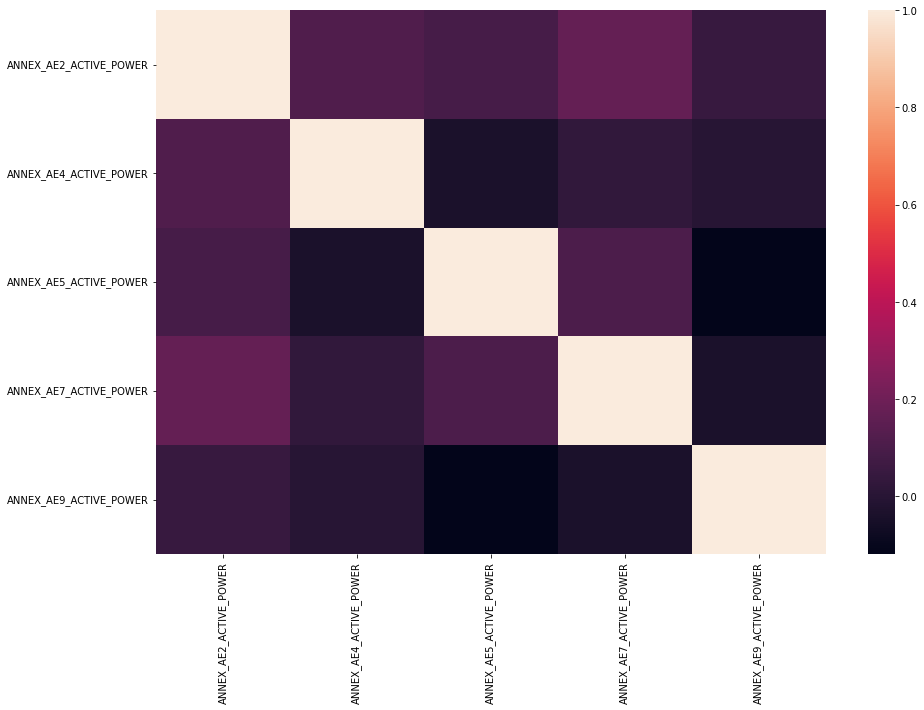

In [57]:
#Create correlation matrix
correlationMatrix = AnnexEastFeb.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()

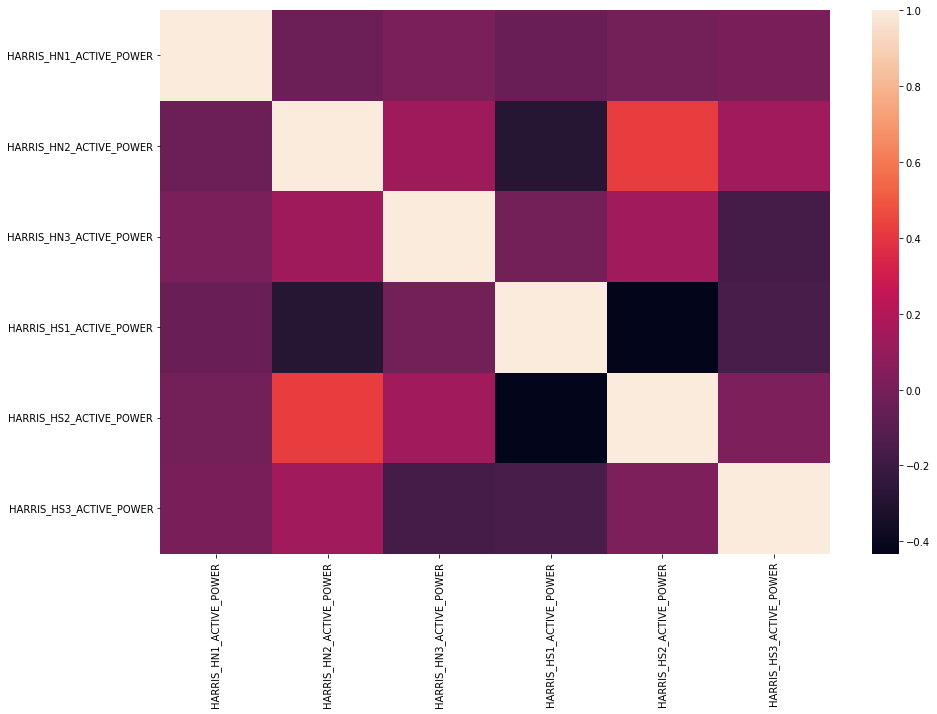

In [58]:
#Create correlation matrix
correlationMatrix = HarrisSouthAug.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()

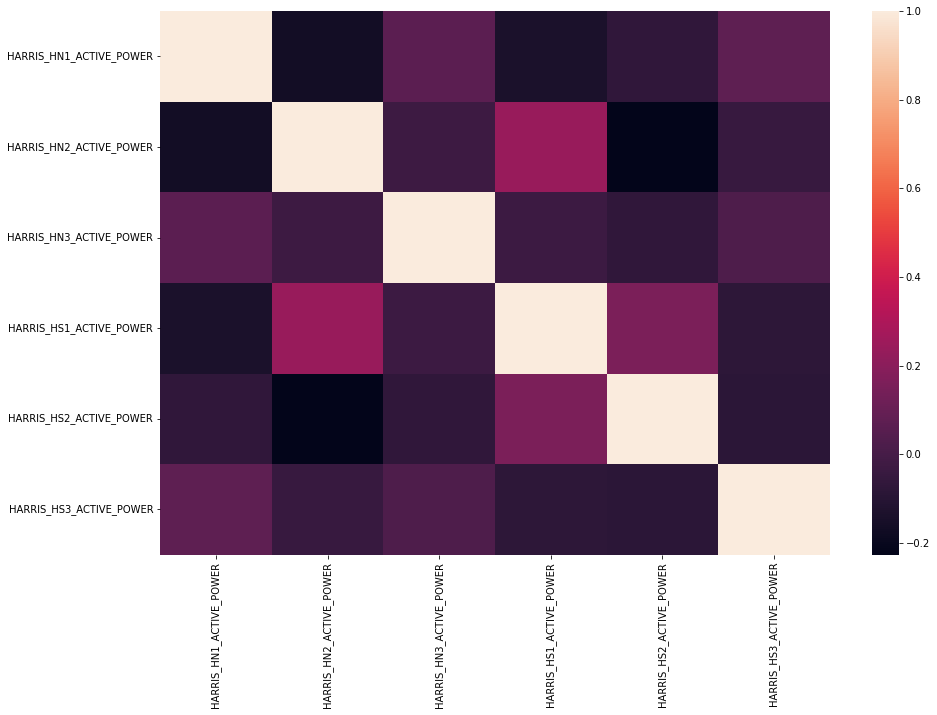

In [59]:
#Create correlation matrix
correlationMatrix = HarrisSouthFeb.corr()
plt.figure(figsize=(15,10)) 
sn.heatmap(correlationMatrix, annot=False)
plt.show()